<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Proyecto_ComplementarioI_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

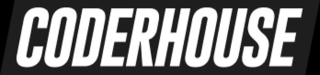

# **CURSO DE DATA SCIENCE**
# Comisión 41870

# **DESAFIO Complementario - EVALUANDO PROYECTOS DE ML**

*AUTOR: Eduardo Ettlin

Continuarás trabajando con base en lo realizado en el Desafío entregable: **ProyectoDS_Parte_I**, en esta oportunidad deberás complementar con lo siguiente:


1. Continuaremos trabajando con base en lo realizado en el Desafío entregable: Estructurando un proyecto de DS-Parte II y III, en esta oportunidad deberás complementar con lo siguiente:

2. Generar una evaluación de modelos apropiados para el problema de interés

3. Identificar por medio de las métricas generadas si se puede tener una situación de overfitting (sobreajuste) o underfitting (subajuste), discutiendo posibles formas de mejora



**Aspectos a incluir**

El código debe estar hecho en un notebook y debe estar probado.

**Formato**

Entregar un archivo con formato .ipynb. Debe tener el nombre “Proyecto_ComplementarioI_+Apellido.ipynb”  

**Sugerencias**

Preparar el código y probar los resultados con subconjuntos del conjunto original.


In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **DATASET ELEGIDO:**

Link de acceso al sitio de Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
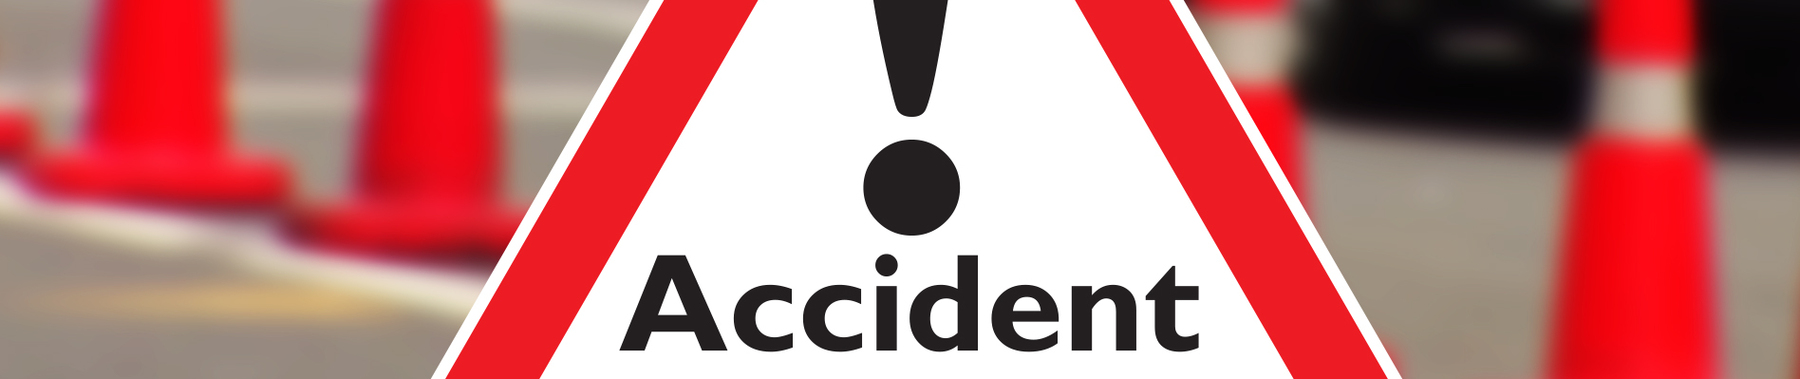


Contiene la información sobre accidentes en las principales ciudades de EE. UU. Posee una gran cantidad de variables que podrían relacionar causas y efectos de accidentes.



# **Paquetes Utilizados**

Se importan los paquetes necesarios

In [2]:
import statsmodels.formula.api as sm #regresion lineal
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
#pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import numpy as np # algebra lineal

# visualizaciones
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 

import statsmodels.formula.api as sm #regresion lineal


In [3]:
! pip install chart_studio -q
! pip install bqplot -q
! pip install pingouin -q   #quiet mode (Sin tanto detalle)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import chart_studio.plotly     as py

# **Importación de Datos**

Se importan los datos y se procesan

In [5]:
full_df =  pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv', nrows=500000) # Limitar Registros Optimizar Proceso (, nrows=500000) 


**# Se visualizan los primeros datos del Dataframe con sus nombre de columna**

In [6]:
full_df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.100,36.100,58.000,29.760,10.000,SW,10.400,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.000,NaN,97.000,29.700,10.000,Calm,NaN,0.020,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062,-81.538,41.062,-81.535,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.000,NaN,55.000,29.650,10.000,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172,-84.493,39.170,-84.502,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.000,29.800,93.000,29.690,10.000,WSW,10.400,0.010,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### **Se visualiza la tupla de dimensiones de matriz que indica el número de filas y columnas de un DataFrame dado.**



In [7]:
full_df.shape

(500000, 47)

**Se visualiza La información que contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).**

In [8]:
full_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## ENRIQUECER DATOS y CAMPOS ADICIONALES ###
Las variables disponibles seleccionadas son:
* Severity
* Temperature(F)
* Wind_Chill(F)
* Precipitation(in)


Se agregan algunas columnas calculadas a partir de los mismos datos sobre todo FECHAS

* Hora
* Año_mes
* Dia_Semana
* Dia_Semana_Nombre




In [9]:
full_df['Temp'] = full_df['Temperature(F)'] + full_df['Wind_Chill(F)'] # Crear una variable numérica

In [10]:
full_df['Hora'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la cual ocurrió el accidente

In [11]:
full_df['Anio_Mes'] =  pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES

In [14]:
full_df['day_of_week'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

In [15]:
days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}   # Nombre del Día de la Semana
full_df['day_of_week_lbl'] = full_df['day_of_week'].apply(lambda x: days[x])

In [16]:
full_df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temp,Hora,Anio_Mes,day_of_week,day_of_week_lbl
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.100,36.100,58.000,29.760,10.000,SW,10.400,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,78.200,0,2016-02,0,Lunes
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,NaN,5,2016-02,0,Lunes
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.000,NaN,97.000,29.700,10.000,Calm,NaN,0.020,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,NaN,6,2016-02,0,Lunes


## ANALISIS del DATASET 

In [17]:
full_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora,day_of_week
count,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,174323.000,489463.000,300816.000,488953.000,491174.000,488689.000,455806.000,290983.000,300816.000,500000.000,500000.000
mean,2.211,36.227,-95.291,36.227,-95.291,0.787,7340.674,65.153,61.397,63.542,29.655,9.230,7.987,0.012,124.183,12.692,2.605
std,0.545,5.274,17.781,5.274,17.780,1.596,14481.554,17.701,21.690,22.464,0.883,2.716,5.476,0.171,40.982,5.314,1.800
min,2.000,24.570,-124.548,24.570,-124.546,0.000,1.000,-22.000,-44.000,1.000,0.020,0.000,0.000,0.000,-63.000,0.000,0.000
25%,2.000,33.340,-117.495,33.342,-117.494,0.114,1201.000,54.000,48.000,48.000,29.610,10.000,5.000,0.000,96.000,8.000,1.000
50%,2.000,36.141,-88.006,36.141,-88.006,0.363,3845.000,67.000,66.000,65.000,29.910,10.000,7.000,0.000,132.000,14.000,3.000
75%,2.000,40.237,-80.324,40.238,-80.324,0.821,9002.000,78.100,78.000,82.000,30.050,10.000,10.400,0.000,156.000,17.000,4.000
max,4.000,49.001,-67.113,49.075,-67.109,151.525,961051.000,196.000,196.000,100.000,56.540,111.000,822.800,24.000,392.000,23.000,6.000


##¿Hay muchas columnas en 0?


In [18]:
cols = full_df[full_df == 0].count(axis=0)
cols[cols > 0]

Distance(mi)          15607
Temperature(F)           83
Wind_Chill(F)           102
Visibility(mi)          421
Wind_Speed(mph)       48469
Precipitation(in)    258225
Amenity              495363
Bump                 499869
Crossing             468684
Give_Way             498728
Junction             434959
No_Exit              499258
Railway              496324
Roundabout           499982
Station              489538
Stop                 492221
Traffic_Calming      499762
Traffic_Signal       459012
Turning_Loop         500000
Temp                     39
Hora                   7512
day_of_week           76546
dtype: int64

Recordemos que tenemos 2.845.342 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.

## Reducción del DF para analizar correlación ##


In [19]:
small_df = full_df[['Severity', 'City', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition', 'Hora', 'day_of_week', 'Anio_Mes']]
small_df.head(7)

,Severity,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Weather_Condition,Hora,day_of_week,Anio_Mes
0,3,Dublin,Franklin,OH,42.100,36.100,58.000,29.760,10.000,Light Rain,0,0,2016-02
1,2,Dayton,Montgomery,OH,36.900,NaN,91.000,29.680,10.000,Light Rain,5,0,2016-02
2,2,Cincinnati,Hamilton,OH,36.000,NaN,97.000,29.700,10.000,Overcast,6,0,2016-02
3,2,Akron,Summit,OH,39.000,NaN,55.000,29.650,10.000,Overcast,6,0,2016-02
4,3,Cincinnati,Hamilton,OH,37.000,29.800,93.000,29.690,10.000,Light Rain,7,0,2016-02
5,2,Williamsburg,Clermont,OH,35.600,29.200,100.000,29.660,10.000,Overcast,8,0,2016-02
6,2,Dayton,Montgomery,OH,33.800,NaN,100.000,29.630,3.000,Mostly Cloudy,8,0,2016-02


In [20]:
small_df.corr()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora,day_of_week
Severity,1.000,-0.075,-0.227,0.042,0.107,0.007,-0.042,0.018
Temperature(F),-0.075,1.000,0.995,-0.352,0.098,0.209,0.186,0.000
Wind_Chill(F),-0.227,0.995,1.000,-0.304,0.068,0.217,0.181,0.037
Humidity(%),0.042,-0.352,-0.304,1.000,0.108,-0.359,-0.261,-0.000
Pressure(in),0.107,0.098,0.068,0.108,1.000,0.068,-0.036,-0.066
Visibility(mi),0.007,0.209,0.217,-0.359,0.068,1.000,0.074,-0.007
Hora,-0.042,0.186,0.181,-0.261,-0.036,0.074,1.000,0.010
day_of_week,0.018,0.000,0.037,-0.000,-0.066,-0.007,0.010,1.000


## Correlación Básica con HEAT MAP ##

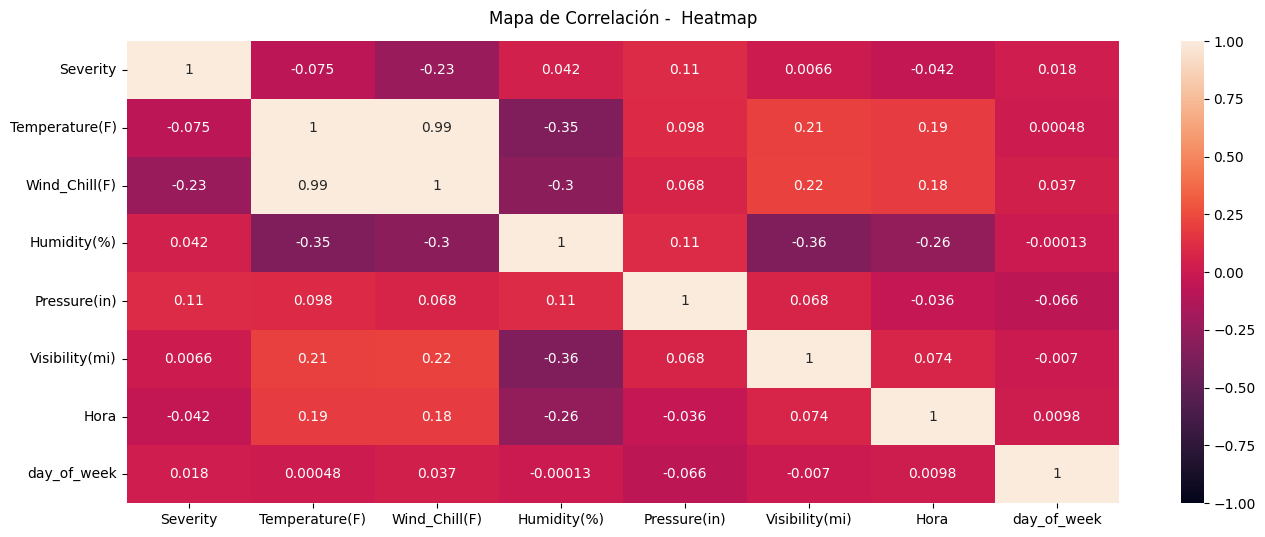

In [21]:
# Definir el Tamaplo
plt.figure(figsize=(16, 6))

# Archivar el heatmap object en una variable para manejar mejor las propiedades.
# Cambiar los valores del grafico. Colores entre  -1 y 1, y setear las anotaciones para ver las correlaciones.
heatmap = sns.heatmap(small_df.corr(), vmin=-1, vmax=1, annot=True)

# Ponérle un Tículo al mapa. 
heatmap.set_title('Mapa de Correlación -  Heatmap', fontdict={'fontsize':12}, pad=12);

## VARIABLE DE ANÁLISIS ##

**Severidad**

Se quiere analizar si severidad tiene factores que se correlacionan

SEVERIDAD tiene 4 categorías que funcionan como etiquetas.

La curva de recuperación de precisión no es compatible con la configuración de múltiples etiquetas. Sin embargo, uno puede decidir cómo manejar este caso. 

#Extraer Campor NUMERICOS#

Data Frame de Valóres Numéricos
Reemplazar Nulos
Quitar Duplicados


In [24]:
df_num = full_df.select_dtypes('number') # datos númericos
df_num.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora,day_of_week
0,3,40.109,-83.093,40.112,-83.032,3.230,NaN,42.100,36.100,58.000,29.760,10.000,10.400,0.000,78.200,0,0
1,2,39.865,-84.063,39.865,-84.049,0.747,NaN,36.900,NaN,91.000,29.680,10.000,NaN,0.020,NaN,5,0
2,2,39.103,-84.525,39.102,-84.524,0.055,NaN,36.000,NaN,97.000,29.700,10.000,NaN,0.020,NaN,6,0
3,2,41.062,-81.538,41.062,-81.535,0.123,NaN,39.000,NaN,55.000,29.650,10.000,NaN,NaN,NaN,6,0
4,3,39.172,-84.493,39.170,-84.502,0.500,NaN,37.000,29.800,93.000,29.690,10.000,10.400,0.010,66.800,7,0


In [22]:
# split del dataset
from sklearn.model_selection import train_test_split

In [25]:
# separamos las caracteristicas/features del target
X = df_num
y = df_num['Severity']
X = X.drop('Severity', axis=1)

X.fillna(0, inplace=True)   # Se reemplazan los valores nulos por 0

X


,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora,day_of_week
0,40.109,-83.093,40.112,-83.032,3.230,0.000,42.100,36.100,58.000,29.760,10.000,10.400,0.000,78.200,0,0
1,39.865,-84.063,39.865,-84.049,0.747,0.000,36.900,0.000,91.000,29.680,10.000,0.000,0.020,0.000,5,0
2,39.103,-84.525,39.102,-84.524,0.055,0.000,36.000,0.000,97.000,29.700,10.000,0.000,0.020,0.000,6,0
3,41.062,-81.538,41.062,-81.535,0.123,0.000,39.000,0.000,55.000,29.650,10.000,0.000,0.000,0.000,6,0
4,39.172,-84.493,39.170,-84.502,0.500,0.000,37.000,29.800,93.000,29.690,10.000,10.400,0.010,66.800,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,33.941,-117.273,33.941,-117.261,0.650,0.000,77.000,77.000,44.000,28.380,10.000,5.000,0.000,154.000,1,2
499996,34.675,-86.039,34.676,-86.039,0.074,301.000,35.000,27.000,65.000,29.240,10.000,13.000,0.000,62.000,8,1
499997,34.677,-86.037,34.678,-86.037,0.050,503.000,54.000,54.000,97.000,29.110,2.000,0.000,0.020,108.000,22,6
499998,33.906,-118.183,33.937,-118.173,2.256,0.000,74.000,74.000,55.000,29.880,9.000,8.000,0.000,148.000,14,1


In [26]:
y

0         3
1         2
2         2
3         2
4         3
         ..
499995    2
499996    2
499997    2
499998    2
499999    2
Name: Severity, Length: 500000, dtype: int64

### **ENTRENAMIENTO DE MODELOS**

In [27]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (400000, 16)
Tamaño del set de testeo: (100000, 16)


In [28]:
X_train

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora,day_of_week
336245,36.163,-95.909,36.163,-95.906,0.178,6201.000,54.000,54.000,75.000,29.240,10.000,8.000,0.000,108.000,0,2
466628,33.935,-118.089,33.935,-118.092,0.196,11507.000,73.000,73.000,57.000,29.820,10.000,0.000,0.000,146.000,8,0
6895,33.928,-118.244,33.928,-118.239,0.265,0.000,82.000,0.000,17.000,29.930,10.000,12.700,0.000,0.000,13,2
118739,33.941,-117.233,33.939,-117.222,0.647,0.000,70.500,0.000,50.000,29.930,10.000,10.400,0.000,0.000,16,1
370169,34.154,-118.288,34.143,-118.278,0.899,0.000,73.000,73.000,68.000,29.720,10.000,0.000,0.000,146.000,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71659,41.858,-87.644,41.851,-87.645,0.449,0.000,84.000,0.000,63.000,29.780,10.000,11.500,0.000,0.000,13,5
110226,32.772,-117.161,32.777,-117.162,0.380,0.000,57.000,0.000,89.000,30.010,7.000,8.100,0.010,0.000,16,2
142919,32.724,-117.039,32.724,-117.039,0.009,7201.000,59.000,0.000,59.000,30.080,10.000,5.800,0.000,0.000,17,2
329009,29.485,-98.535,29.485,-98.535,0.014,0.000,70.000,70.000,87.000,29.210,10.000,14.000,0.000,140.000,7,5


### Árbol de Decisión:
Pros:
-------
* alta capacidad de explicar la decisión
* aceptan variables categóricas

Contras:
-----------
* necesitan data balanceada
* tienen a sobre ajuste (Se vera en la sig Clase)

In [29]:
# modelos
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Paso 1: Instanciar el objeto/modelo
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

In [31]:
# entrenamiento
#Paso 2: Ajustar el modelo con los datos
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [32]:
# predicciones
# Paso 3: Predecir
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [33]:
X_test.shape, y_test.shape

((100000, 16), (100000,))

In [34]:
X_test

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora,day_of_week
298515,27.894,-82.724,27.893,-82.729,0.334,6315.000,69.000,69.000,84.000,29.990,10.000,12.000,0.000,138.000,16,0
498780,41.733,-72.663,41.742,-72.663,0.678,0.000,45.000,43.000,42.000,30.380,10.000,5.000,0.000,88.000,19,4
380712,44.992,-93.285,44.988,-93.289,0.326,0.000,67.000,67.000,39.000,29.300,10.000,0.000,0.000,134.000,15,2
21422,30.197,-93.253,30.197,-93.228,1.488,0.000,75.900,0.000,94.000,30.030,10.000,5.800,0.000,0.000,8,3
428721,36.266,-86.757,36.269,-86.756,0.218,3833.000,74.000,74.000,34.000,29.460,10.000,6.000,0.000,148.000,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196419,37.315,-121.828,37.323,-121.835,0.691,0.000,55.400,0.000,77.000,30.090,10.000,5.800,0.000,0.000,8,2
126239,34.238,-118.322,34.236,-118.335,0.760,8643.000,84.900,0.000,44.000,29.870,10.000,9.200,0.000,0.000,16,4
415567,30.163,-97.691,30.164,-97.693,0.115,8710.000,84.000,84.000,76.000,29.470,10.000,8.000,0.000,168.000,12,6
342787,35.017,-85.179,35.017,-85.179,0.021,0.000,81.000,81.000,67.000,29.360,10.000,7.000,0.000,162.000,16,4


In [35]:
y_pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
y_test[:10].values

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
# evaluacion 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
recall = recall_score(y_train, y_pred_train, average='micro')
precision = precision_score(y_train, y_pred_train, average='micro')
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='micro')

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 0.9995
Precision: 0.9995
F1: 0.9995
Accuracy: 0.9995


In [39]:
confusion_matrix(y_test, y_pred)

array([[78353,  4257,  2844],
       [ 4487,  2846,   665],
       [ 2776,   646,  3126]])

In [40]:
y_test.value_counts()

2    85454
3     7998
4     6548
Name: Severity, dtype: int64

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.92      0.92      0.92     85454
           3       0.37      0.36      0.36      7998
           4       0.47      0.48      0.47      6548

    accuracy                           0.84    100000
   macro avg       0.58      0.58      0.58    100000
weighted avg       0.84      0.84      0.84    100000



### Feature importance

In [42]:
tree_model.feature_importances_

array([0.06917715, 0.07296175, 0.07567998, 0.07770031, 0.14144823,
       0.0747594 , 0.05108216, 0.01303621, 0.05143161, 0.07456207,
       0.0116073 , 0.03711004, 0.00633365, 0.15308912, 0.06015103,
       0.02986998])

In [43]:
df_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia

,Variable,Importancia
13,Temp,0.153
4,Distance(mi),0.141
3,End_Lng,0.078
2,End_Lat,0.076
5,Number,0.075
9,Pressure(in),0.075
1,Start_Lng,0.073
0,Start_Lat,0.069
14,Hora,0.060
8,Humidity(%),0.051


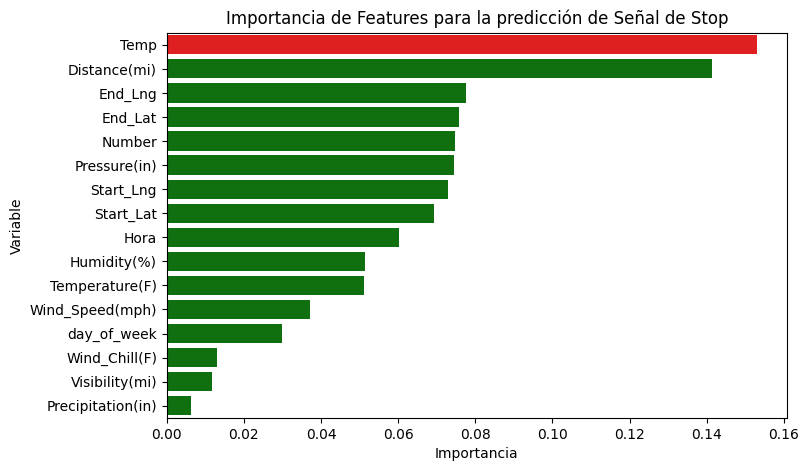

In [44]:
plt.figure(figsize=(8,5))

values = df_importancia.Importancia    

sns.barplot(y=df_importancia.Variable,
            x=values,
            palette = ['green' if (x < max(values)) else 'red' for x in values ]
           ).set(title='Importancia de Features para la predicción de Señal de Stop')

plt.show()